# 4. ML-модель
**Задача:** построить модель, которая будет предсказывать вероятность неплатежа клиента в следующем месяце.	Необходимо описать все выполняемые этапы построения, например, обработка данных, нормализация, отбор предикторов, оценка результатов построения, сравнение различных моделей и тд.
**Входные данные:** набор данных содержит информацию о дефолтных платежах, демографических факторах, кредитных данных, истории платежей и выписках по счетам клиентов по кредитным картам на Тайване с апреля 2005 г. по сентябрь 2005 г. Наименование файла с данными - `UCI_Credit_Card.csv`

**Описание переменных:** всего 25 переменных:
- `ID`: ID каждого клиента
- `LIMIT_BAL`: сумма предоставленного кредита в тайваньских долларах (включает индивидуальный и семейный / дополнительный кредит)
- `SEX`: Пол (1 = мужской, 2 = женский)
- `EDUCATION`: (1 = аспирантура, 2 = университет, 3 = средняя школа, 4 = другие, 5 = неизвестно, 6 = неизвестно)
- `MARRIAGE`: Семейное положение (1 = женат, 2 = холост, 3 = другие)
- `AGE`: Возраст в годах
- --------------------------------------------------------------------
- `PAY_0`: Статус погашения в сентябре 2005 г. (-1 = своевременная оплата, 1 = задержка платежа на один месяц, 2 = задержка платежа на два месяца,… 8 = задержка платежа на восемь месяцев, 9 = задержка платежа на девять месяцев и более)
- `PAY_2`: Статус погашения в августе 2005 г. (шкала такая же, как указано выше)
- `PAY_3`: Статус погашения в июле 2005 г. (шкала такая же, как указано выше)
- `PAY_4`: Статус погашения в июне 2005 г. (шкала такая же, как указано выше)
- `PAY_5`: Статус погашения в мае 2005 г. (шкала такая же, как указано выше)
- `PAY_6`: Статус погашения в апреле 2005 г. (шкала такая же, как указано выше)\
- ---------------------------------------------------------------------
- `BILL_AMT1`: Сумма выписки по счету за сентябрь 2005 г. (NT-доллар)
- `BILL_AMT2`: Сумма выписки по счету в августе 2005 г. (NT-доллар)
- `BILL_AMT3`: Сумма выписки по счету за июль 2005 г. (NT-доллар)
- `BILL_AMT4`: Сумма выписки по счету в июне 2005 г. (NT-доллар)
- `BILL_AMT5`: Сумма выписки по счету в мае 2005 г. (NT-доллар)
- `BILL_AMT6`: Сумма выписки по счету в апреле 2005 г. (NT-доллар)
- --------------------------------------------------------------------
- `PAY_AMT1`: Сумма предыдущего платежа в сентябре 2005 г. (NT-доллар)
- `PAY_AMT2`: Сумма предыдущего платежа в августе 2005 г. (NT-доллар)
- `PAY_AMT3`: Сумма предыдущего платежа в июле 2005 г. (NT-доллар)
- `PAY_AMT4`: Сумма предыдущего платежа в июне 2005 г. (NT-доллар)
- `PAY_AMT5`: Сумма предыдущего платежа в мае 2005 г. (NT-доллар)
- `PAY_AMT6`: Сумма предыдущего платежа в апреле 2005 г. (NT-доллар)
- ---------------------------------------------------------------------
- `default.payment.next.month`: дефолт платежа в следующем месяце (1 = да, 0 = нет)

In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [373]:
df = pd.read_csv('data/credit.csv')
pd.set_option('display.max_columns', None)

In [374]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [375]:
df.shape

(30000, 25)

Установлю более понятные названия для колонок и расположу их в более логичном порядке:

In [376]:
df.columns = [
    'id', 'limit_bal', 'sex', 'education', 'marriage', 'age',
    'pay_09', 'pay_08', 'pay_07', 'pay_06', 'pay_05', 'pay_04', 
    'bill_amt_09', 'bill_amt_08', 'bill_amt_07', 'bill_amt_06', 'bill_amt_05', 'bill_amt_04',
    'pay_amt_09', 'pay_amt_08', 'pay_amt_07', 'pay_amt_06', 'pay_amt_05', 'pay_amt_04',
    'default_payment_next_month'
]

In [377]:
right_order = [
    'limit_bal', 'sex', 'education', 'marriage', 'age',
    'bill_amt_04', 'bill_amt_05', 'bill_amt_06', 'bill_amt_07', 'bill_amt_08', 'bill_amt_09',
    'pay_amt_04', 'pay_amt_05', 'pay_amt_06', 'pay_amt_07', 'pay_amt_08', 'pay_amt_09',
    'pay_04', 'pay_05', 'pay_06', 'pay_07', 'pay_08', 'pay_09',
    'default_payment_next_month'
]

df = df[right_order].copy()

In [378]:
df.head(3)

,limit_bal,sex,education,marriage,age,bill_amt_04,bill_amt_05,bill_amt_06,bill_amt_07,bill_amt_08,bill_amt_09,pay_amt_04,pay_amt_05,pay_amt_06,pay_amt_07,pay_amt_08,pay_amt_09,pay_04,pay_05,pay_06,pay_07,pay_08,pay_09,default_payment_next_month
0,20000.0,2,2,1,24,0.0,0.0,0.0,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,-2,-2,-1,-1,2,2,1
1,120000.0,2,2,2,26,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,2,0,0,0,2,-1,1
2,90000.0,2,2,2,34,15549.0,14948.0,14331.0,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0,0,0,0,0,0,0


Еще раз, что означают колонки:
- `bill_amt_04`: Сумма выписки по счету за апрель 2005 г. (NT-доллар)
- `bill_amt_05`: Сумма выписки по счету в мае 2005 г. (NT-доллар)
- `bill_amt_06`: Сумма выписки по счету за июнь 2005 г. (NT-доллар)
- `bill_amt_07`: Сумма выписки по счету в июле 2005 г. (NT-доллар)
- `bill_amt_08`: Сумма выписки по счету в августе 2005 г. (NT-доллар)
- `bill_amt_09`: Сумма выписки по счету в сентябре 2005 г. (NT-доллар)
- --------------------------------------------------------------------
- `pay_amt_04`: Сумма предыдущего платежа в апреле 2005 г. (NT-доллар)
- `pay_amt_05`: Сумма предыдущего платежа в мае 2005 г. (NT-доллар)
- `pay_amt_06`: Сумма предыдущего платежа в июне 2005 г. (NT-доллар)
- `pay_amt_07`: Сумма предыдущего платежа в июле 2005 г. (NT-доллар)
- `pay_amt_08`: Сумма предыдущего платежа в августе 2005 г. (NT-доллар)
- `pay_amt_09`: Сумма предыдущего платежа в сентябре 2005 г. (NT-доллар)
- ----------------------------------------------------------------------
- `pay_04`: Статус погашения в апреле 2005 г. (-1 = своевременная оплата, 1 = задержка платежа на один месяц, 2 = задержка платежа на два месяца,… 8 = задержка платежа на восемь месяцев, 9 = задержка платежа на девять месяцев и более)
- `pay_05`: Статус погашения в мае 2005 г. (шкала такая же, как указано выше)
- `pay_06`: Статус погашения в июне 2005 г. (шкала такая же, как указано выше)
- `pay_07`: Статус погашения в июле 2005 г. (шкала такая же, как указано выше)
- `pay_08`: Статус погашения в августе 2005 г. (шкала такая же, как указано выше)
- `pay_09`: Статус погашения в сентябре 2005 г. (шкала такая же, как указано выше)\

Проверю наличие пропущщенных значений:

In [379]:
df.isna().sum()

limit_bal                     0
sex                           0
education                     0
marriage                      0
age                           0
bill_amt_04                   0
bill_amt_05                   0
bill_amt_06                   0
bill_amt_07                   0
bill_amt_08                   0
bill_amt_09                   0
pay_amt_04                    0
pay_amt_05                    0
pay_amt_06                    0
pay_amt_07                    0
pay_amt_08                    0
pay_amt_09                    0
pay_04                        0
pay_05                        0
pay_06                        0
pay_07                        0
pay_08                        0
pay_09                        0
default_payment_next_month    0
dtype: int64

## 1. Исследование данных и визуализация

In [380]:
df.head(3)

,limit_bal,sex,education,marriage,age,bill_amt_04,bill_amt_05,bill_amt_06,bill_amt_07,bill_amt_08,bill_amt_09,pay_amt_04,pay_amt_05,pay_amt_06,pay_amt_07,pay_amt_08,pay_amt_09,pay_04,pay_05,pay_06,pay_07,pay_08,pay_09,default_payment_next_month
0,20000.0,2,2,1,24,0.0,0.0,0.0,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,-2,-2,-1,-1,2,2,1
1,120000.0,2,2,2,26,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,2,0,0,0,2,-1,1
2,90000.0,2,2,2,34,15549.0,14948.0,14331.0,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0,0,0,0,0,0,0


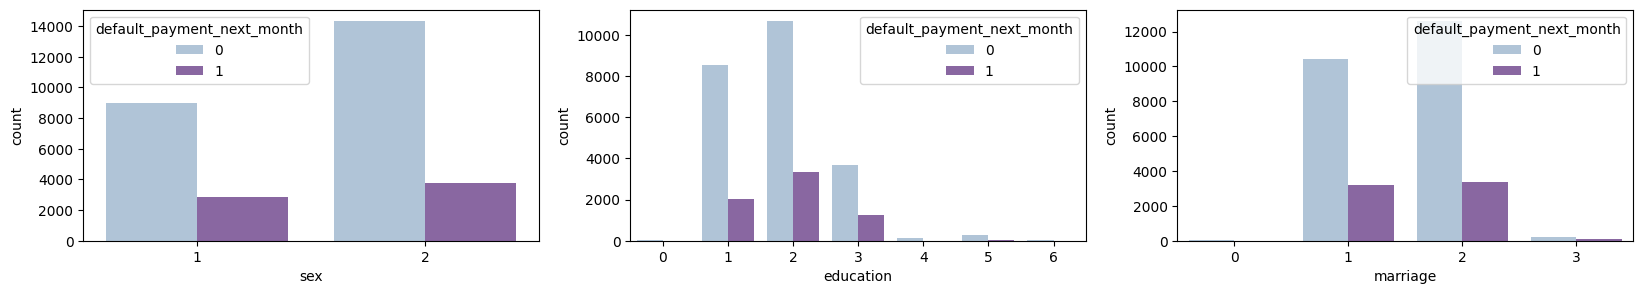

In [381]:
plt.figure(figsize=(20, 3))

for i, col in enumerate(['sex', 'education', 'marriage']):
    plt.subplot(1, 3, 1+i)
    sns.countplot(x=col, data=df, hue='default_payment_next_month', palette='BuPu')

plt.show()

Сразу можно удалить некоторые выбросы:

In [382]:
df = df[df.education != 0].copy()
df = df[df.marriage != 0].copy()

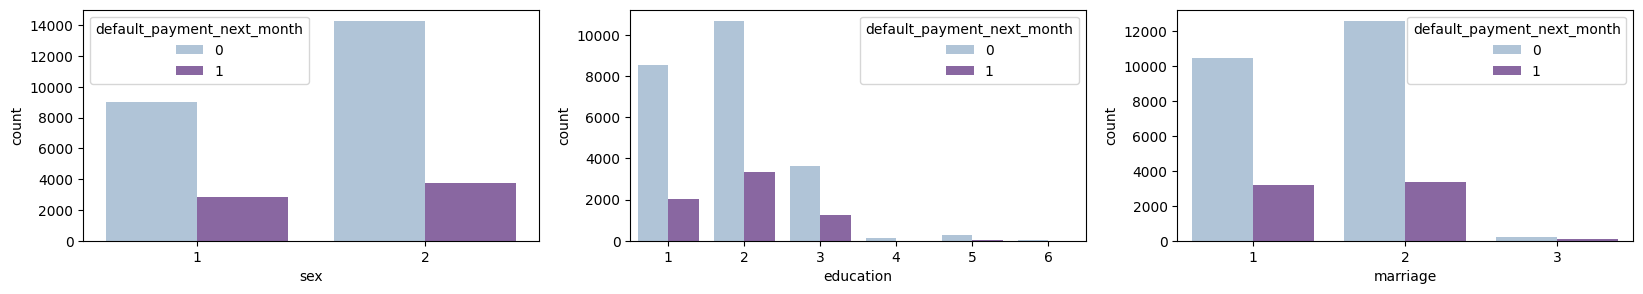

In [383]:
plt.figure(figsize=(20, 3))

for i, col in enumerate(['sex', 'education', 'marriage']):
    plt.subplot(1, 3, 1+i)
    sns.countplot(x=col, data=df, hue='default_payment_next_month', palette='BuPu')

plt.show()

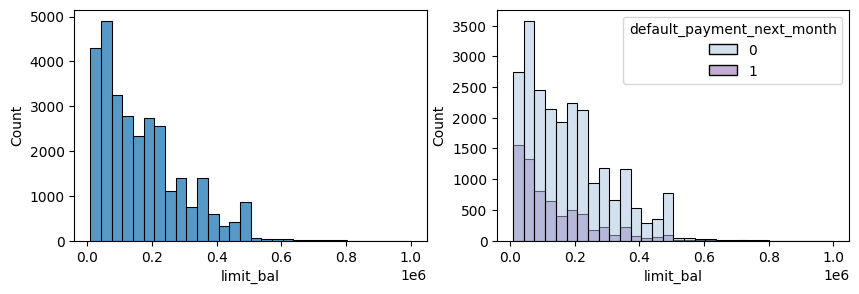

In [384]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
sns.histplot(x='limit_bal', data=df, bins=30)

plt.subplot(1, 2, 2)
sns.histplot(x='limit_bal', data=df, hue='default_payment_next_month', palette='BuPu', bins=30)

plt.show()

По правому графику видно, что в среднем дефолт по погашению долга чаще происходит с кредитными картами с меньшим балансом.

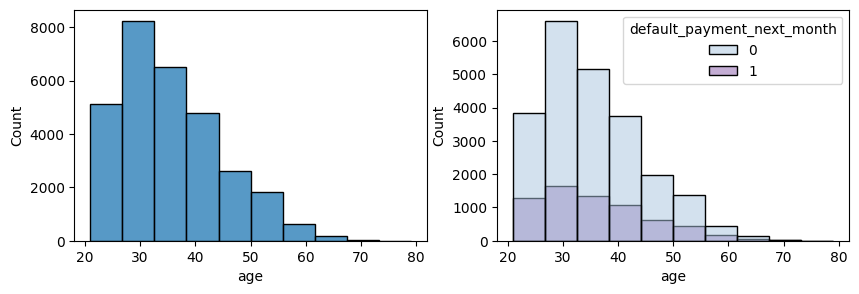

In [385]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
sns.histplot(x='age', data=df, bins=10)

plt.subplot(1, 2, 2)
sns.histplot(x='age', data=df, hue='default_payment_next_month', palette='BuPu', bins=10)

plt.show()

По ворасту никаких особых тенденций не наблюдается.

Посмотрим на соотношения меток целевой переменной:

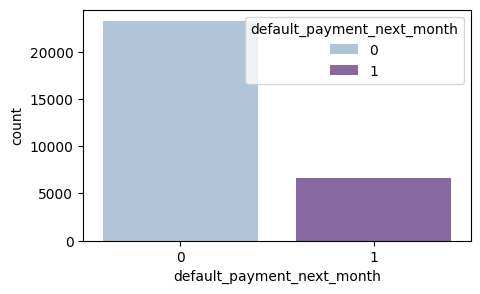

In [386]:
plt.figure(figsize=(5, 3))
sns.countplot(x='default_payment_next_month', hue='default_payment_next_month', palette='BuPu', data=df)
plt.show()

In [387]:
df.default_payment_next_month.value_counts(normalize=True)

default_payment_next_month
0    0.778465
1    0.221535
Name: proportion, dtype: float64

Можно посмотреть линейные зависимости между фичами:

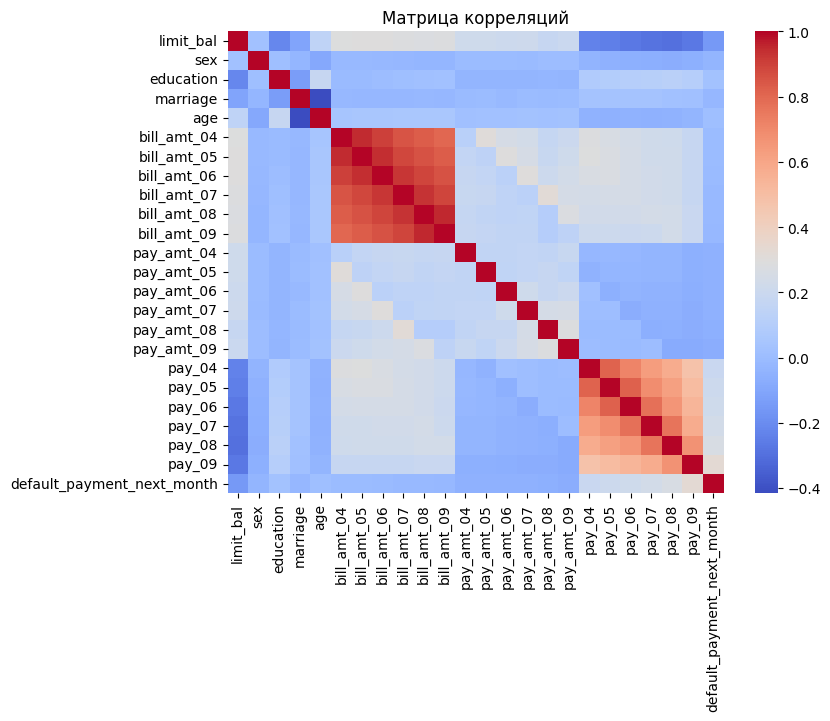

In [388]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

Видно довольно сильную корреляцию (0.8-0.9) между признаками, отвечающими за выплаты по кредиту за определенный месяц, а также корреляцию поменьше между признаками, отвечающими за статус погашения долга, в конкретном месяце. В общем, это логично, потому что большинство людей следуют определенной "стратегии" погашения кредита: например, человек либо старается всегда погашать долг до окончания месяца, либо систематически задерживается с оплатой; также и с платежами - платежи обычно поступают определенными порциями. 

Также необходимо проверить данные на наличие ошибок или выбросов:

In [389]:
df.describe()

,limit_bal,sex,education,marriage,age,bill_amt_04,bill_amt_05,bill_amt_06,bill_amt_07,bill_amt_08,bill_amt_09,pay_amt_04,pay_amt_05,pay_amt_06,pay_amt_07,pay_amt_08,pay_amt_09,pay_04,pay_05,pay_06,pay_07,pay_08,pay_09,default_payment_next_month
count,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.00000,29932.000000,2.993200e+04,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,2.993200e+04,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000
mean,167523.375651,1.603568,1.852399,1.554590,35.479721,38927.267072,40367.54861,43320.699452,4.707703e+04,49242.862589,51297.386109,5221.906421,4805.269310,4830.180075,5226.158760,5.923502e+03,5659.603034,-0.290358,-0.265569,-0.220099,-0.165776,-0.133235,-0.016203,0.221535
std,129821.209970,0.489164,0.788941,0.518277,9.219044,59601.231051,60845.48775,64385.857098,6.940473e+04,71230.373793,73694.489286,17795.285035,15294.066811,15680.849676,17620.773728,2.306020e+04,16555.874642,1.149735,1.133057,1.168849,1.196386,1.196990,1.123450,0.415287
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-339603.000000,-81334.00000,-170000.000000,-1.572640e+05,-69777.000000,-165580.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,1261.000000,1772.75000,2339.750000,2.685500e+03,2989.750000,3577.000000,122.000000,255.000000,298.000000,390.000000,8.360000e+02,1000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,17111.500000,18125.50000,19068.500000,2.011150e+04,21234.500000,22420.500000,1500.000000,1500.000000,1500.000000,1800.000000,2.010000e+03,2100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,49260.250000,50253.50000,54613.250000,6.025250e+04,64136.000000,67283.500000,4000.000000,4040.250000,4015.000000,4507.250000,5.000000e+03,5006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,961664.000000,927171.00000,891586.000000,1.664089e+06,983931.000000,964511.000000,528666.000000,426529.000000,621000.000000,896040.000000,1.684259e+06,873552.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000


In [390]:
df[df.bill_amt_04 < 0].head(5)

,limit_bal,sex,education,marriage,age,bill_amt_04,bill_amt_05,bill_amt_06,bill_amt_07,bill_amt_08,bill_amt_09,pay_amt_04,pay_amt_05,pay_amt_06,pay_amt_07,pay_amt_08,pay_amt_09,pay_04,pay_05,pay_06,pay_07,pay_08,pay_09,default_payment_next_month
26,60000.0,1,1,2,27,-189.0,127.0,-57.0,259.0,-425.0,-109.0,1000.0,0.0,500.0,0.0,1000.0,0.0,-1,-1,-1,-1,-2,1,1
35,160000.0,1,1,2,30,-1884.0,-1488.0,-923.0,-527.0,-131.0,30265.0,0.0,792.0,565.0,396.0,396.0,131.0,-1,-2,-2,-2,-1,-1,0
109,360000.0,1,2,1,35,-103.0,-103.0,-103.0,-103.0,-103.0,-103.0,0.0,0.0,0.0,0.0,0.0,0.0,-2,-2,-2,-2,-2,1,0
134,30000.0,2,2,2,22,-780.0,17603.0,25350.0,26712.0,26145.0,28452.0,1560.0,0.0,500.0,0.0,1400.0,2000.0,0,0,0,0,0,0,0
167,100000.0,1,2,1,27,-246.0,22979.0,29336.0,58824.0,96847.0,102349.0,50000.0,12.0,1398.0,1330.0,0.0,3166.0,0,0,0,2,2,-1,0


Абсолютно не понятно, как сумма долга по счету может быть отрицательной. Либо это ошибка ввода и, на самом деле, они должны быть с противоположным знаком (судя по второй строке нет: долг есть, выплаты нет - статус погашен своевременно), либо они должны быть приравнены к нулю.

In [391]:
mask = (df.bill_amt_04 < 0) | (df.bill_amt_05 < 0) | (df.bill_amt_06 < 0) | (df.bill_amt_07 < 0) | (df.bill_amt_08 < 0) | (df.bill_amt_09 < 0)
mask.sum()

1929

Я думаю, что так как мне непонятно природа таких значений, то самым разумным будет удалить их (потому что таких значений не слишком много по сравнению с размером датасета), чтобы не зашумлять модель ими:

In [392]:
df = df[~mask].copy()
df.shape

(28003, 24)

In [393]:
df.describe()

,limit_bal,sex,education,marriage,age,bill_amt_04,bill_amt_05,bill_amt_06,bill_amt_07,bill_amt_08,bill_amt_09,pay_amt_04,pay_amt_05,pay_amt_06,pay_amt_07,pay_amt_08,pay_amt_09,pay_04,pay_05,pay_06,pay_07,pay_08,pay_09,default_payment_next_month
count,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,2.800300e+04,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000
mean,164482.722565,1.606114,1.861479,1.554691,35.444167,40953.979359,42444.248366,45584.799664,49322.181695,51674.216905,53706.227761,5099.986573,4742.812377,4723.067743,5170.425062,5.765530e+03,5677.416348,-0.233189,-0.210120,-0.163411,-0.110560,-0.073528,0.013177,0.225440
std,129063.752097,0.488619,0.786458,0.518048,9.243373,60417.670899,61775.287681,65391.565191,69553.673219,72203.842098,74615.640767,17303.968273,14536.834482,14790.520093,17126.116597,1.967030e+04,16300.441304,1.140812,1.125121,1.159365,1.182928,1.185490,1.112360,0.417879
min,10000.000000,1.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,1983.000000,2645.000000,3405.500000,3992.000000,4256.000000,4828.000000,240.000000,348.000000,368.500000,500.000000,1.000000e+03,1068.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,18745.000000,19320.000000,20247.000000,22693.000000,24491.000000,25487.000000,1501.000000,1600.000000,1563.000000,1956.000000,2.089000e+03,2200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,51130.000000,53179.000000,58328.000000,64070.500000,68108.000000,70749.000000,4007.000000,4154.000000,4100.000000,4659.000000,5.000000e+03,5045.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,961664.000000,927171.000000,891586.000000,693131.000000,983931.000000,964511.000000,528666.000000,426529.000000,621000.000000,896040.000000,1.227082e+06,873552.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000


## 2. Инженерия признаков

Буду конструировать новые признаки и отбирать те, что необходимы для обучения модели.

In [394]:
df.head(3)

,limit_bal,sex,education,marriage,age,bill_amt_04,bill_amt_05,bill_amt_06,bill_amt_07,bill_amt_08,bill_amt_09,pay_amt_04,pay_amt_05,pay_amt_06,pay_amt_07,pay_amt_08,pay_amt_09,pay_04,pay_05,pay_06,pay_07,pay_08,pay_09,default_payment_next_month
0,20000.0,2,2,1,24,0.0,0.0,0.0,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,-2,-2,-1,-1,2,2,1
1,120000.0,2,2,2,26,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,2,0,0,0,2,-1,1
2,90000.0,2,2,2,34,15549.0,14948.0,14331.0,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0,0,0,0,0,0,0


Не совсем понятно, на основе чего выставляется статус погашения месячного долга `pay_N`: почти везде, где стоит своевременное погашение, человек совершает платеж меньше, чем выставленный счет. 
У меня есть только одно объяснение этому: видимо, под "своевременным погашением" (`pay_04`, `pay_05`, и т.д.) может подразумеваться, что клиент внёс минимальный обязательный платёж, который требуется банком для того, чтобы считаться "погасившим долг на этот месяц". Этот платёж может быть меньше полной суммы задолженности.

Но, в таком случае, если клиент платит только минимальные платежи, основной долг продолжает оставаться (или даже увеличивается из-за начисленных процентов), но на уровне статуса погашения это может всё равно отмечаться как своевременный платёж. Поэтому нельзя акцентировать сильное внимание на этих признаках.

Также не до конца понятно, что означают некоторые статусы погашения: например, 0 или -2. Думаю, можно считать, что если статус равен 0, то минимальный платеж выполнен, грубо говоря, день-в-день, если значение отрицательное - значит платеж выполнен раньше окончания месяца, а положительное значение означает время просрочки платежа (в месяцах).

На данный момент в моем распоряжении не самые информативные признаки. Например, абсолютные значения выплаты по кредиту почти не о чем не говорят - так что желательно перейти к относительным величинам, которые содержали бы в себе какую-то дополнительную информацию и лучше интерпретировались моделью. Можно создать следующие дополнительные признаки:
- Доля оплаченного долга `pay_ratio_04 = pay_amt_04 / bill_amt_04` - это может лучше показать, насколько клиенты справляются с долгами по кредиту.
- Доля использования кредитного лимита: `max_credit_using_rate = max(bill_amt_04, bill_amt_05, ...) / limit_bal` - высокая доля использования кредита может сигнализировать о том, что клиент приближается к границе своих финансовых возможностей, что увеличивает риск дефолта.
- Количество просрочек `num_delays = sum(pay_04 > 0, pay_05 > 0, ..., pay_09 > 0)` - может помочь модели лучше оценить общий финансовый статус клиента. Если у клиента много просрочек, это хороший индикатор риска дефолта.
- Максимальная просрочка `max_delay = max(pay_04, pay_05, ...)` - максимальное число месяц, на которое был просрочен платеж по кредиту.
- Накопление долга `debt_accumulation = (bill_amt_09 - bill_amt_04) / limit_bal` - показывает увеличивается ли относительная задолженность из месяца в месяц.

In [395]:
for i in range(4, 10):
    df[f'pay_ratio_0{i}'] = np.where(df[f'bill_amt_0{i}'] != 0, df[f'pay_amt_0{i}'] / df[f'bill_amt_0{i}'], 1)

df['max_credit_using_rate'] = df[['bill_amt_04', 'bill_amt_05', 'bill_amt_06', 'bill_amt_07', 'bill_amt_08', 'bill_amt_09']].max(axis=1) / df['limit_bal']

df['num_delays'] = (df[['pay_04', 'pay_05', 'pay_06', 'pay_07', 'pay_08', 'pay_09']] > 0).sum(axis=1)

df['max_delay'] = np.where(
    df[['pay_04', 'pay_05', 'pay_06', 'pay_07', 'pay_08', 'pay_09']].max(axis=1) > 0,
    df[['pay_04', 'pay_05', 'pay_06', 'pay_07', 'pay_08', 'pay_09']].max(axis=1),
    0
)

df['debt_accumulation'] = (df['bill_amt_09'] - df['bill_amt_04']) / df['limit_bal']

Старые признаки с абсолютными значениями можно удалить, потому что всю информацию о них мы сагрегировали в новых признаках:

In [396]:
df.drop(columns=[
    'bill_amt_04', 'bill_amt_05', 'bill_amt_06', 'bill_amt_07', 'bill_amt_08', 'bill_amt_09',
    'pay_amt_04', 'pay_amt_05', 'pay_amt_06', 'pay_amt_07', 'pay_amt_08', 'pay_amt_09',
    'pay_04', 'pay_05', 'pay_06', 'pay_07', 'pay_08', 'pay_09'
], inplace=True)

Посмотрим на распределения новых фичей:

In [397]:
df.head(3)

,limit_bal,sex,education,marriage,age,default_payment_next_month,pay_ratio_04,pay_ratio_05,pay_ratio_06,pay_ratio_07,pay_ratio_08,pay_ratio_09,max_credit_using_rate,num_delays,max_delay,debt_accumulation
0,20000.0,2,2,1,24,1,1.000000,1.000000,1.000000,0.000000,0.222115,0.000000,0.195650,2,2,0.195650
1,120000.0,2,2,2,26,1,0.613309,0.000000,0.305623,0.372856,0.579710,0.000000,0.028792,2,2,-0.004825
2,90000.0,2,2,2,34,0,0.321564,0.066899,0.069779,0.073752,0.106937,0.051917,0.324878,0,0,0.152111


In [398]:
df.describe()

,limit_bal,sex,education,marriage,age,default_payment_next_month,pay_ratio_04,pay_ratio_05,pay_ratio_06,pay_ratio_07,pay_ratio_08,pay_ratio_09,max_credit_using_rate,num_delays,max_delay,debt_accumulation
count,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000
mean,164482.722565,1.606114,1.861479,1.554691,35.444167,0.225440,1.283946,1.181248,1.720695,1.712162,1.563629,1.691296,0.514263,0.856480,0.694104,0.108431
std,129063.752097,0.488619,0.786458,0.518048,9.243373,0.417879,19.607125,16.605376,76.773124,54.235537,41.537175,75.485558,0.427955,1.589375,1.090893,0.299557
min,10000.000000,1.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.827300
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.035764,0.036057,0.033011,0.033636,0.038468,0.038880,0.086755,0.000000,0.000000,-0.031121
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.058594,0.055708,0.050630,0.057815,0.071131,0.070263,0.474264,0.000000,0.000000,0.007827
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,1.000000,0.828570,0.622606,0.623644,0.604511,0.490423,0.937161,1.000000,2.000000,0.193626
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,1.000000,2643.330000,1738.424242,8891.357143,6333.333333,4444.333333,11453.666667,6.455300,6.000000,8.000000,5.309500


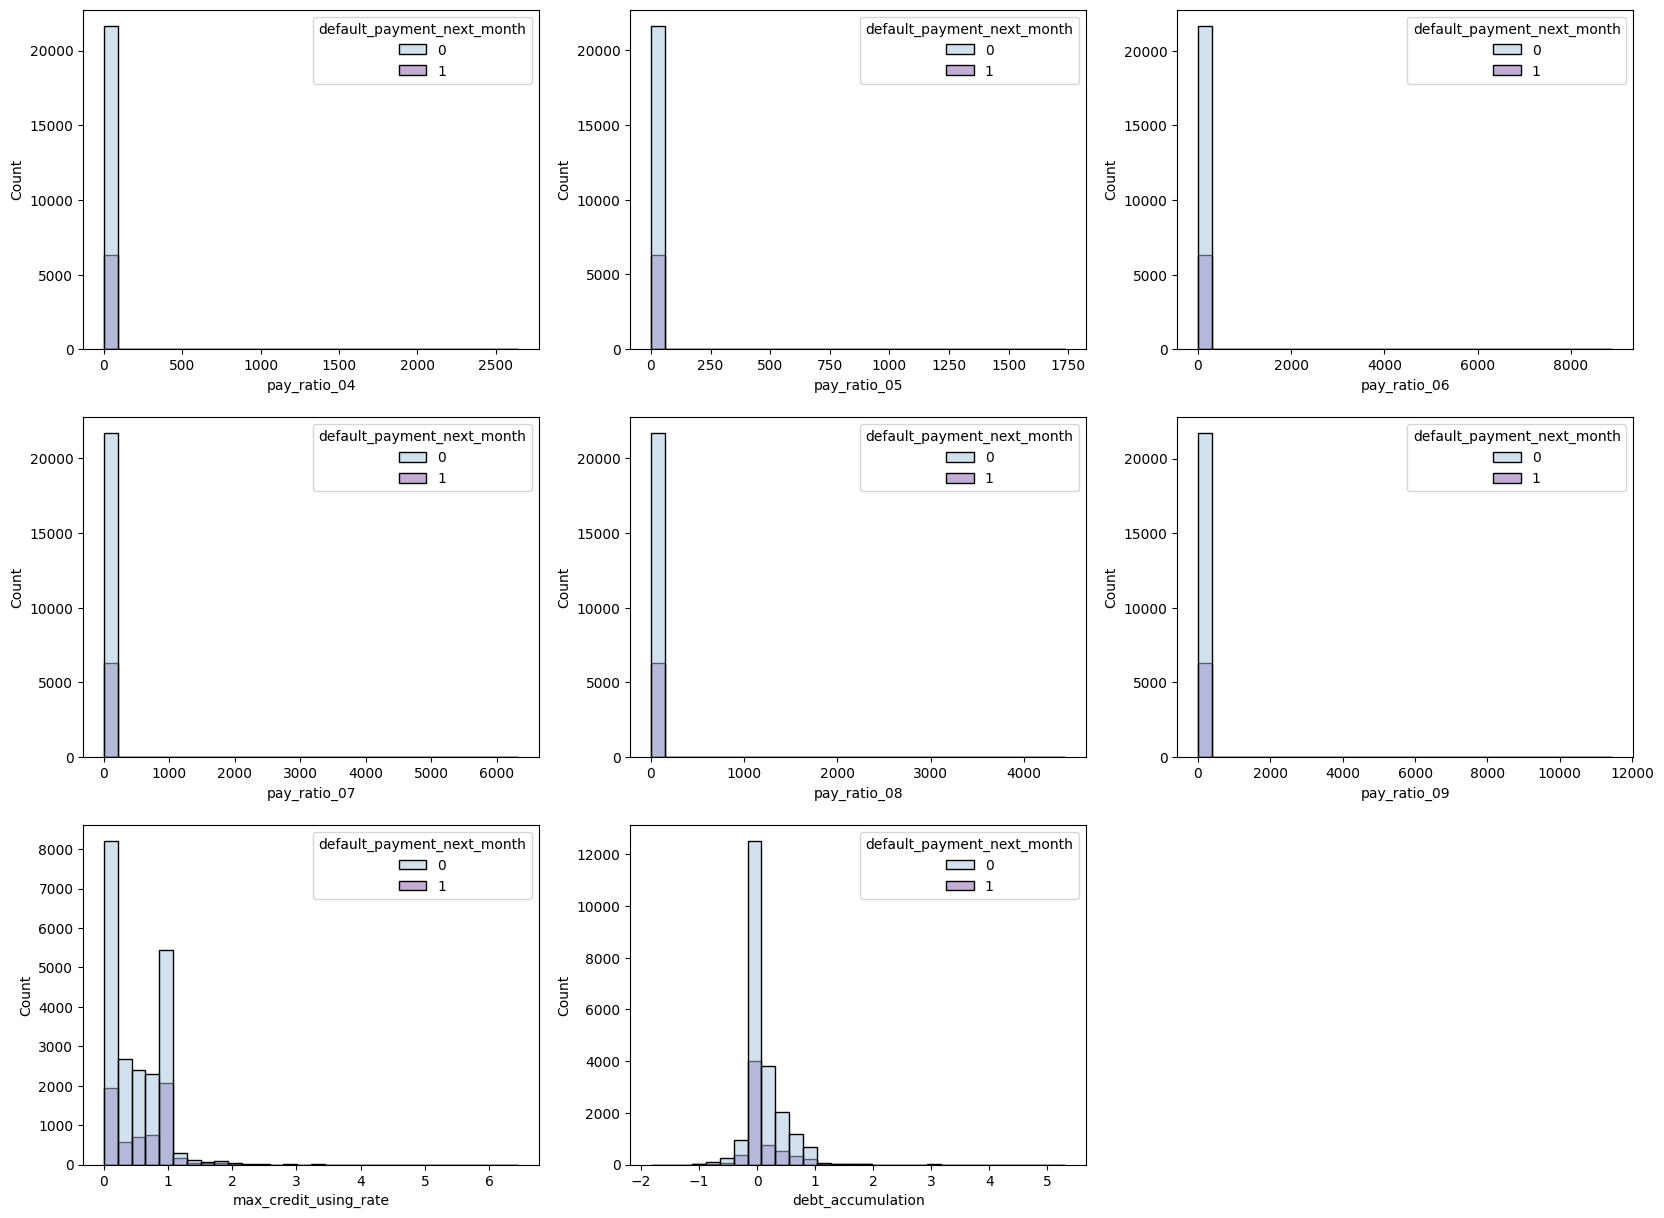

In [399]:
cols = ['pay_ratio_04', 'pay_ratio_05', 'pay_ratio_06', 'pay_ratio_07', 'pay_ratio_08', 'pay_ratio_09', 'max_credit_using_rate', 'debt_accumulation']
plt.figure(figsize=(20, 15))

for i, col in enumerate(cols):
    plt.subplot(3, 3, 1+i)
    sns.histplot(x=col, data=df, hue='default_payment_next_month', palette='BuPu', bins=30)

plt.show()

Еще не совсем понятно, как платеж по кредиту может быть больше выставленного счета. Буду считать, что такое невозможно и это ошибка, а на самом деле платеж должен быть раавен размеру счета в таком случае:

In [400]:
df.isna().sum()

limit_bal                     0
sex                           0
education                     0
marriage                      0
age                           0
default_payment_next_month    0
pay_ratio_04                  0
pay_ratio_05                  0
pay_ratio_06                  0
pay_ratio_07                  0
pay_ratio_08                  0
pay_ratio_09                  0
max_credit_using_rate         0
num_delays                    0
max_delay                     0
debt_accumulation             0
dtype: int64

In [401]:
cols = ['pay_ratio_04', 'pay_ratio_05', 'pay_ratio_06', 'pay_ratio_07', 'pay_ratio_08', 'pay_ratio_09']

for col in cols:
    df[col] = df[col].apply(lambda x: 1 if x > 1 else x)

In [402]:
df.shape

(28003, 16)

In [403]:
df.head()

,limit_bal,sex,education,marriage,age,default_payment_next_month,pay_ratio_04,pay_ratio_05,pay_ratio_06,pay_ratio_07,pay_ratio_08,pay_ratio_09,max_credit_using_rate,num_delays,max_delay,debt_accumulation
0,20000.0,2,2,1,24,1,1.000000,1.000000,1.000000,0.000000,0.222115,0.000000,0.195650,2,2,0.195650
1,120000.0,2,2,2,26,1,0.613309,0.000000,0.305623,0.372856,0.579710,0.000000,0.028792,2,2,-0.004825
2,90000.0,2,2,2,34,0,0.321564,0.066899,0.069779,0.073752,0.106937,0.051917,0.324878,0,0,0.152111
3,50000.0,2,2,1,37,0,0.033844,0.036914,0.038850,0.024345,0.041859,0.042562,0.985820,0,0,0.348860
4,50000.0,1,2,1,57,0,0.035492,0.035987,0.429799,0.279057,1.000000,0.232099,0.716700,0,0,-0.210280


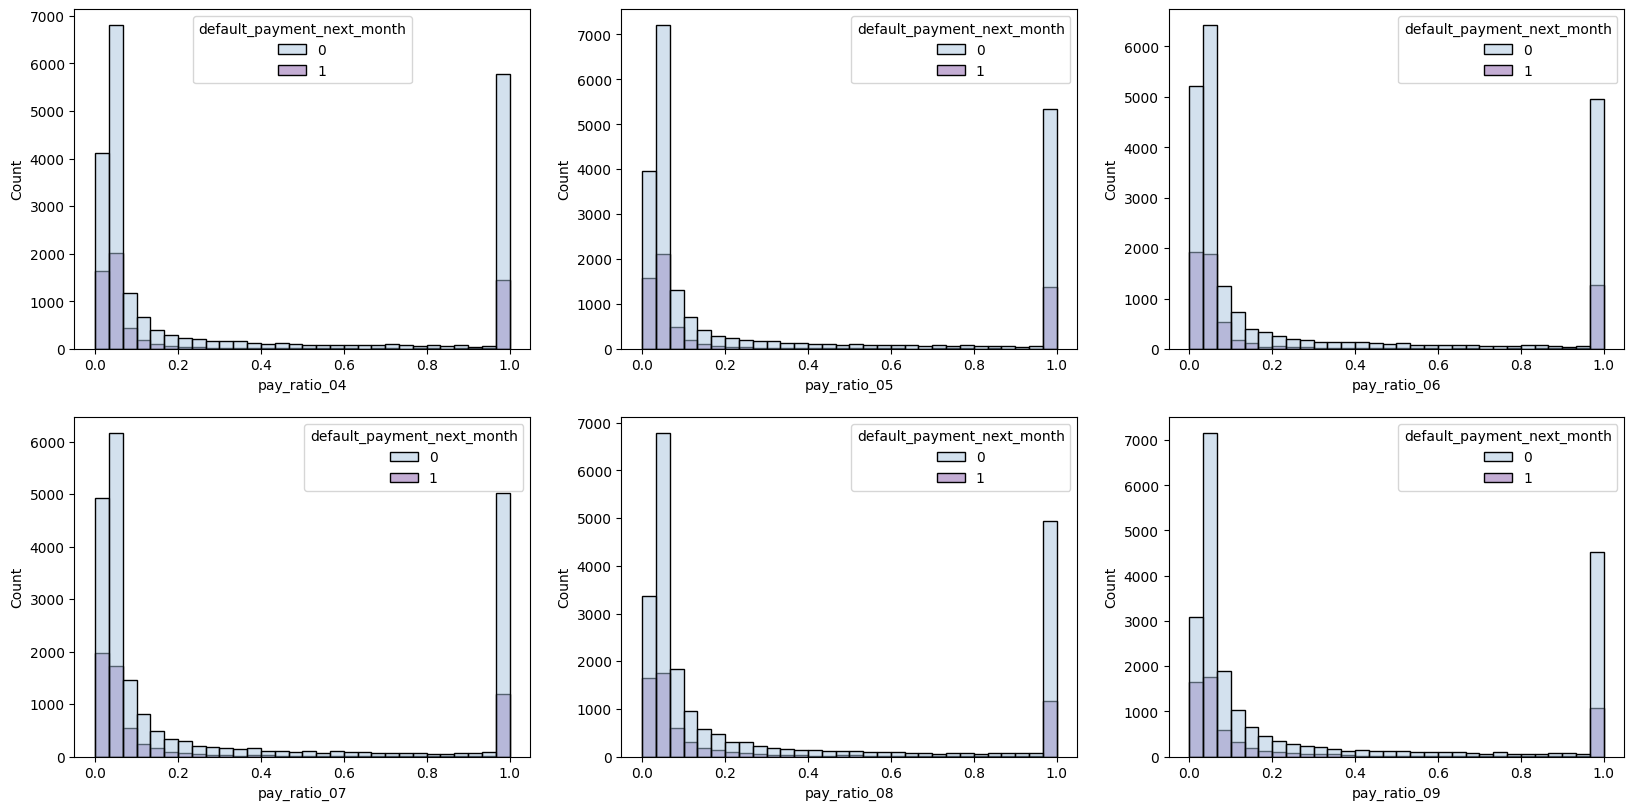

In [404]:
cols = ['pay_ratio_04', 'pay_ratio_05', 'pay_ratio_06', 'pay_ratio_07', 'pay_ratio_08', 'pay_ratio_09']
plt.figure(figsize=(20, 15))

for i, col in enumerate(cols):
    plt.subplot(3, 3, 1+i)
    sns.histplot(x=col, data=df, hue='default_payment_next_month', palette='BuPu', bins=30)

plt.show()

Странная статистика: получается, что довольно много дефолтов среди людей, которые полностью погашают платеж. 

Также непонятно, как долг может быть больше, чем лимит на кредиты и как доля накопления долга может быть по модулю больше 1. Такие значения можно установить на границы:

In [405]:
df['max_credit_using_rate'] = df['max_credit_using_rate'].apply(lambda x: 1 if x > 1 else x)
df['debt_accumulation'] = df['debt_accumulation'].apply(lambda x: 1 if x > 1 else -1 if x < -1 else x)

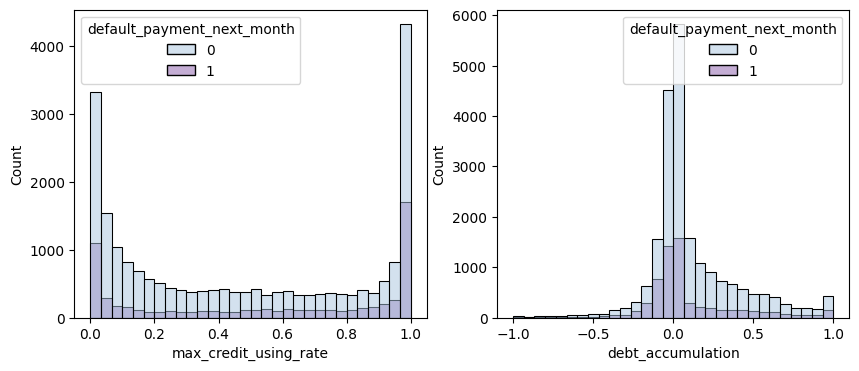

In [406]:
cols = ['max_credit_using_rate', 'debt_accumulation']
plt.figure(figsize=(10, 4))

for i, col in enumerate(cols):
    plt.subplot(1, 2, 1+i)
    sns.histplot(x=col, data=df, hue='default_payment_next_month', palette='BuPu', bins=30)

plt.show()

Можно еще раз посмотреть на матрицу корреляций, но уже с новыми фичами:

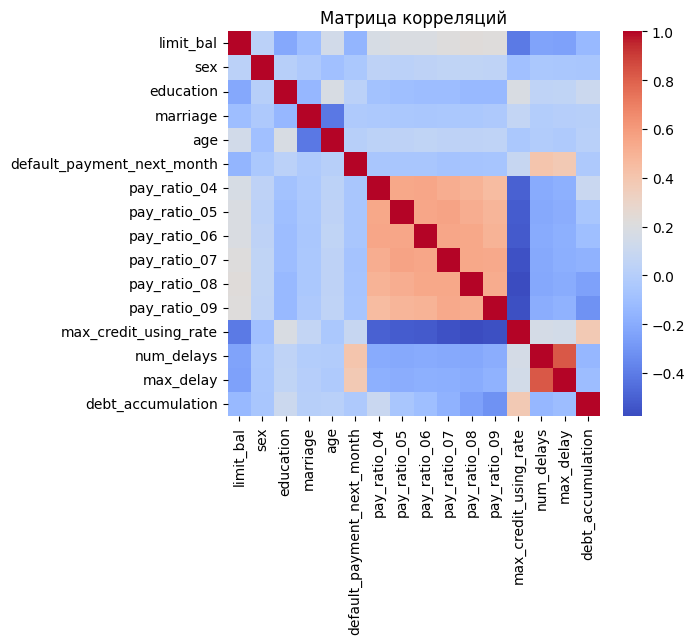

In [407]:
corr_matrix = df.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

In [409]:
df.describe()

,limit_bal,sex,education,marriage,age,default_payment_next_month,pay_ratio_04,pay_ratio_05,pay_ratio_06,pay_ratio_07,pay_ratio_08,pay_ratio_09,max_credit_using_rate,num_delays,max_delay,debt_accumulation
count,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000
mean,164482.722565,1.606114,1.861479,1.554691,35.444167,0.225440,0.337986,0.320337,0.299947,0.303268,0.308954,0.295796,0.496500,0.856480,0.694104,0.105503
std,129063.752097,0.488619,0.786458,0.518048,9.243373,0.417879,0.420281,0.411522,0.403173,0.401634,0.396301,0.386577,0.388379,1.589375,1.090893,0.283022
min,10000.000000,1.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.035764,0.036057,0.033011,0.033636,0.038468,0.038880,0.086755,0.000000,0.000000,-0.031121
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.058594,0.055708,0.050630,0.057815,0.071131,0.070263,0.474264,0.000000,0.000000,0.007827
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,1.000000,0.828570,0.622606,0.623644,0.604511,0.490423,0.937161,1.000000,2.000000,0.193626
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,8.000000,1.000000


## 3. Нормализация данных

In [410]:
from sklearn.model_selection import train_test_split

In [411]:
X, y = df.drop(columns=['default_payment_next_month']), df['default_payment_next_month']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

Признаки `pay_ratio_N` уже находятся в диапазоне \[0; 1\], приведу остальные к тому же масштабу:

In [412]:
from sklearn.preprocessing import MinMaxScaler

In [413]:
scaler =  MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [414]:
X_train.head(3)

,limit_bal,sex,education,marriage,age,pay_ratio_04,pay_ratio_05,pay_ratio_06,pay_ratio_07,pay_ratio_08,pay_ratio_09,max_credit_using_rate,num_delays,max_delay,debt_accumulation
0,0.392405,0.0,0.0,0.0,0.431034,1.0,0.435536,1.000000,0.670765,0.875731,1.000000,0.028316,0.0,0.0,0.499366
1,0.278481,1.0,0.0,0.5,0.068966,1.0,1.000000,0.000000,0.408895,0.143423,0.145648,0.143109,0.0,0.0,0.571554
2,0.253165,1.0,0.4,0.0,0.551724,0.0,0.077395,0.037294,0.040229,0.047082,0.048958,0.310300,0.0,0.0,0.481021


## 4. Формулировка задачи и метрик качества

Необходимо построит модель, которая бы оценивала вероятность неплатежа (дефолта) пользователя в следующем месяце. В такой задаче можно выбирать разные метрики, которые необходимо максимизировать в зависимости от бизнес-требований:
- если бизнесу очень важно иметь как можно меньше дефолтов по кредитам, то в таком случае необходимо минимизировать долю ложноотрицательных срабатываний и, соответственно, максимизировать recall;
- если бизнес может позволить себе пропускать некоторые дефолты, но никак не позволит ошибочно считать человека неплатежеспособным в следующем месяце, то необходимо максимизировать precision;
- возможно, для бизнеса важны и та, и другая сторона вопроса - в таком случае можно использовать, например, метрики f1-score или ROC-AUC.

Так как я не могу знать целей бизнеса, то буду использовать третий подход.

## 5. Обучение моделей

In [415]:
from sklearn.metrics import f1_score, fbeta_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
import optuna
import logging

logging.getLogger("optuna").setLevel(logging.ERROR) # отключение стандартного логирования

In [416]:
def get_metrics(y, y_pred_proba, threshold):
    roc = round(roc_auc_score(y, y_pred_proba), 2)
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    print(classification_report(y, y_pred))
    print(f'ROC-AUC = {roc}\n')

In [417]:
def get_best_threshold(model, X_train, y_train):
    """Находит лучший порог отсечения, который максимизирует метрику f1_macro"""
    y_probs = model.predict_proba(X_train)[:, 1]

    thresholds = np.arange(0.0, 1.0, 0.01)
    f1_scores = []
    
    for threshold in thresholds:
        y_pred = (y_probs >= threshold).astype(int)
        f1 = f1_score(y_train, y_pred, average='macro')
        f1_scores.append(f1)
    
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    optimal_f1 = max(f1_scores)
    return optimal_threshold

### 4.1. Логистическая регрессия

Можно начать с простой модели, чтобы имелся некоторый бейзлайн.

In [418]:
from sklearn.linear_model import LogisticRegression

In [419]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

optimal_threshold = get_best_threshold(model, X_train, y_train)
y_train_proba, y_test_proba = model.predict_proba(X_train)[:, 1], model.predict_proba(X_test)[:, 1]

get_metrics(y_train, y_train_proba, optimal_threshold)
get_metrics(y_test, y_test_proba, optimal_threshold)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     17352
           1       0.51      0.54      0.52      5050

    accuracy                           0.78     22402
   macro avg       0.69      0.69      0.69     22402
weighted avg       0.78      0.78      0.78     22402

ROC-AUC = 0.76

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4338
           1       0.49      0.53      0.51      1263

    accuracy                           0.77      5601
   macro avg       0.68      0.68      0.68      5601
weighted avg       0.78      0.77      0.77      5601

ROC-AUC = 0.76



Попробую подобрать подходящие гиперпараметры через Optuna:

In [420]:
def objective(trial):
    C = trial.suggest_float('C', 1e-4, 1e4, log=True)
    solver = trial.suggest_categorical('solver', ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'])
    penalty = trial.suggest_categorical('penalty', ['l2', 'l1']) if solver == 'saga' else 'l2'
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    tol = trial.suggest_float('tol', 1e-5, 1e-1, log=True)
    
    model = LogisticRegression(C=C, solver=solver, penalty=penalty, max_iter=max_iter, tol=tol, random_state=42)

    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    print(f'Trial {trial.number}: score = {score}')

    return score

In [421]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

Trial 0: score = 0.7616170650603552
Trial 1: score = 0.7456921149725457
Trial 2: score = 0.712934461709019
Trial 3: score = 0.7512902634259002
Trial 4: score = 0.7619001878343603
Trial 5: score = 0.7519056448517579
Trial 6: score = 0.7616190613589092
Trial 7: score = 0.7336027079970819
Trial 8: score = 0.7253493935053029
Trial 9: score = 0.7616148972671896
Trial 10: score = 0.7597313841312671
Trial 11: score = 0.761619004276243
Trial 12: score = 0.7616780045879371
Trial 13: score = 0.7616179787282726
Trial 14: score = 0.7617096678102024
Trial 15: score = 0.761024743519089
Trial 16: score = 0.7616968863567554
Trial 17: score = 0.7617106377223023
Trial 18: score = 0.7617185117434226
Trial 19: score = 0.6869276704993846
Trial 20: score = 0.7587265850359879
Trial 21: score = 0.7616042798748328
Trial 22: score = 0.76170042413391
Trial 23: score = 0.7612725044198582
Trial 24: score = 0.7616364029479546
Trial 25: score = 0.7616806317962765
Trial 26: score = 0.7617231353243001
Trial 27: score 

In [422]:
study.best_params

{'C': 996.34281421123,
 'solver': 'sag',
 'max_iter': 192,
 'tol': 0.020374581918246287}

In [423]:
best_model = LogisticRegression(**study.best_params, random_state=42)
best_model.fit(X_train, y_train)

optimal_threshold = get_best_threshold(best_model, X_train, y_train)

get_metrics(y_train, best_model.predict_proba(X_train)[:, 1], optimal_threshold)
get_metrics(y_test, best_model.predict_proba(X_test)[:, 1], optimal_threshold)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     17352
           1       0.50      0.54      0.52      5050

    accuracy                           0.78     22402
   macro avg       0.68      0.69      0.69     22402
weighted avg       0.78      0.78      0.78     22402

ROC-AUC = 0.76

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4338
           1       0.49      0.54      0.51      1263

    accuracy                           0.77      5601
   macro avg       0.67      0.69      0.68      5601
weighted avg       0.78      0.77      0.77      5601

ROC-AUC = 0.75



В целом, выиграть в качестве не удалось. Можно посмотреть на важность признаков для модели:

In [424]:
pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.coef_.flatten()
}).sort_values(by=['importance'], ascending=False)

,feature,importance
13,max_delay,3.071969
12,num_delays,2.056290
14,debt_accumulation,0.413005
11,max_credit_using_rate,0.275740
4,age,0.195402
6,pay_ratio_05,0.187609
7,pay_ratio_06,0.172770
9,pay_ratio_08,0.152314
10,pay_ratio_09,0.136928
8,pay_ratio_07,0.049754


В общем, можно сказать, что почти все новые признаки, которые удалось сконструировать, довольно информативные для модели.

### 4.2. Случайный лес

In [425]:
from sklearn.ensemble import RandomForestClassifier

In [426]:
model = RandomForestClassifier(max_depth=8, random_state=42)
model.fit(X_train, y_train)

optimal_threshold = get_best_threshold(model, X_train, y_train)

get_metrics(y_train, best_model.predict_proba(X_train)[:, 1], optimal_threshold)
get_metrics(y_test, best_model.predict_proba(X_test)[:, 1], optimal_threshold)

              precision    recall  f1-score   support

           0       0.84      0.91      0.88     17352
           1       0.58      0.40      0.48      5050

    accuracy                           0.80     22402
   macro avg       0.71      0.66      0.68     22402
weighted avg       0.78      0.80      0.79     22402

ROC-AUC = 0.76

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4338
           1       0.57      0.41      0.47      1263

    accuracy                           0.80      5601
   macro avg       0.70      0.66      0.67      5601
weighted avg       0.78      0.80      0.78      5601

ROC-AUC = 0.75



Подберу параметры:

In [429]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 3000)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 10, 35)
    min_samples_split = trial.suggest_int('min_samples_split', 3, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 5, 50)
    class_weight = trial.suggest_categorical('class_weight', ['balanced', None])
    random_state=42
    
    model = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf, class_weight=class_weight, random_state=random_state)

    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    print(f'Trial {trial.number}: score = {score}')

    return score

In [430]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=3)

Trial 0: score = 0.7815586106674202
Trial 1: score = 0.7810998175664622
Trial 2: score = 0.7816719317123615
Trial 3: score = 0.7812007537115015
Trial 4: score = 0.7810933208126319
Trial 5: score = 0.7819599535009731
Trial 6: score = 0.7816212330978812
Trial 7: score = 0.7814468991662403
Trial 8: score = 0.7812946381085968
Trial 9: score = 0.7812505605244081


In [452]:
# study.best_params

In [451]:
# best_model = RandomForestClassifier(**study.best_params, random_state=42)
# best_model.fit(X_train, y_train)

# optimal_threshold = get_best_threshold(best_model, X_train, y_train)

# get_metrics(y_train, best_model.predict_proba(X_train)[:, 1], optimal_threshold)
# get_metrics(y_test, best_model.predict_proba(X_test)[:, 1], optimal_threshold)

Здесь на тесте было 0.77, но случайнйо перезапустил ноутбук и не дождался обучения :(

### 4.3. Градиентный бустинг

In [439]:
from catboost import CatBoostClassifier, Pool

In [440]:
train_pool = Pool(data=X_train, label=y_train)
test_pool = Pool(data=X_test, label=y_test)

In [441]:
model = CatBoostClassifier(iterations=3000, learning_rate=0.01, depth=6, auto_class_weights='Balanced')
model.fit(train_pool)

optimal_threshold = get_best_threshold(model, X_train, y_train)

get_metrics(y_train, best_model.predict_proba(X_train)[:, 1], optimal_threshold)
get_metrics(y_test, best_model.predict_proba(X_test)[:, 1], optimal_threshold)

0:	learn: 0.6906633	total: 182ms	remaining: 9m 5s
1:	learn: 0.6884595	total: 199ms	remaining: 4m 57s
2:	learn: 0.6862763	total: 214ms	remaining: 3m 34s
3:	learn: 0.6839791	total: 226ms	remaining: 2m 49s
4:	learn: 0.6816277	total: 240ms	remaining: 2m 23s
5:	learn: 0.6796457	total: 250ms	remaining: 2m 4s
6:	learn: 0.6776374	total: 259ms	remaining: 1m 50s
7:	learn: 0.6756470	total: 273ms	remaining: 1m 42s
8:	learn: 0.6736892	total: 283ms	remaining: 1m 33s
9:	learn: 0.6718726	total: 292ms	remaining: 1m 27s
10:	learn: 0.6698012	total: 306ms	remaining: 1m 23s
11:	learn: 0.6679469	total: 314ms	remaining: 1m 18s
12:	learn: 0.6664018	total: 320ms	remaining: 1m 13s
13:	learn: 0.6647940	total: 329ms	remaining: 1m 10s
14:	learn: 0.6632878	total: 341ms	remaining: 1m 7s
15:	learn: 0.6615588	total: 351ms	remaining: 1m 5s
16:	learn: 0.6599955	total: 359ms	remaining: 1m 2s
17:	learn: 0.6582971	total: 374ms	remaining: 1m 1s
18:	learn: 0.6566695	total: 385ms	remaining: 1m
19:	learn: 0.6552033	total: 409m

IndexError: list index out of range

Подберу параметры:

In [444]:
def objective(trial):
    iterations = trial.suggest_int('iterations', 1000, 5000)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 0.1, log=True)
    depth = trial.suggest_int('depth', 2, 10)
    auto_class_weights = trial.suggest_categorical('auto_class_weight', [None, 'Balanced'])
    eval_metric = 'AUC'
    early_stopping_rounds = 50
    random_state=42
    
    model = CatBoostClassifier(
        iterations=iterations, learning_rate=learning_rate, depth=depth, auto_class_weights=auto_class_weights,
        eval_metric=eval_metric, early_stopping_rounds=early_stopping_rounds, random_state=random_state, verbose=0
    )

    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    print(f'Trial {trial.number}: score = {score}')

    return score

In [445]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=3)

Trial 0: score = 0.7797893625119798
Trial 1: score = 0.7778573285343449
Trial 2: score = 0.7722605528434849


In [449]:
params = study.best_params
del params['auto_class_weight']
params

{'iterations': 1414, 'learning_rate': 0.0035102395425482148, 'depth': 5}

In [450]:
best_model = CatBoostClassifier(**params, eval_metric = 'AUC', early_stopping_rounds = 50, random_state=42)
best_model.fit(X_train, y_train)

optimal_threshold = get_best_threshold(best_model, X_train, y_train)

get_metrics(y_train, best_model.predict_proba(X_train)[:, 1], optimal_threshold)
get_metrics(y_test, best_model.predict_proba(X_test)[:, 1], optimal_threshold)

0:	total: 9.83ms	remaining: 13.9s
1:	total: 22.6ms	remaining: 15.9s
2:	total: 34.2ms	remaining: 16.1s
3:	total: 109ms	remaining: 38.5s
4:	total: 127ms	remaining: 35.8s
5:	total: 142ms	remaining: 33.3s
6:	total: 156ms	remaining: 31.4s
7:	total: 167ms	remaining: 29.4s
8:	total: 177ms	remaining: 27.6s
9:	total: 187ms	remaining: 26.3s
10:	total: 195ms	remaining: 24.9s
11:	total: 202ms	remaining: 23.6s
12:	total: 215ms	remaining: 23.1s
13:	total: 224ms	remaining: 22.4s
14:	total: 236ms	remaining: 22.1s
15:	total: 261ms	remaining: 22.8s
16:	total: 285ms	remaining: 23.4s
17:	total: 299ms	remaining: 23.2s
18:	total: 314ms	remaining: 23.1s
19:	total: 322ms	remaining: 22.5s
20:	total: 332ms	remaining: 22s
21:	total: 345ms	remaining: 21.9s
22:	total: 353ms	remaining: 21.3s
23:	total: 361ms	remaining: 20.9s
24:	total: 369ms	remaining: 20.5s
25:	total: 381ms	remaining: 20.3s
26:	total: 389ms	remaining: 20s
27:	total: 397ms	remaining: 19.6s
28:	total: 411ms	remaining: 19.6s
29:	total: 419ms	remainin

## Вывод
Данные довольно сильно зашумлены и плохо разделимы по меткам таргета. Лучшее качество на тесте по ROC-AUC показала модель с использованием градиентного бустинга.